### Exploratory Data Analysis EDA - Health Insurance Data

Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data:

In [2]:
insurance_data = pd.read_csv('insurance.csv')

In [3]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_data.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
no_of_rows = insurance_data.shape[0]
no_of_columns = insurance_data.shape[1]

print('No of rows = ',no_of_rows)
print('No of rows = ',no_of_columns)

No of rows =  1338
No of rows =  7


In [8]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
 #list(insurance_data.columns)

#### Total Info Of Data

In [10]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Duplicate Values in Tabel

In [11]:
insurance_data.duplicated().any()

True

In [12]:
insurance_data[insurance_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [13]:
insurance_data[insurance_data['charges']== 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


#### Drop Duplicate

In [14]:
insurance_data1 = insurance_data.drop_duplicates()

In [15]:
insurance_data1.shape

(1337, 7)

#### Access the specific value

In [16]:
insurance_data1.iloc[0:3, 0:7]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


#### Check for Missing Values

In [17]:
insurance_data1.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [18]:
insurance_data1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### List of Categorical and Numerical Columns 

In [19]:
insurance_data.describe(include = "number")

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
insurance_data.describe(exclude = "number")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#### Creating Data Frame with selecting specific columns

In [21]:
col_list = ['age','bmi','region']
df2 =  insurance_data1[col_list]
df2.head()

,age,bmi,region
0,19,27.900,southwest
1,18,33.770,southeast
2,28,33.000,southeast
3,33,22.705,northwest
4,32,28.880,northwest


In [22]:
df1 = insurance_data[['age','sex','bmi']]
df1

,age,sex,bmi
0,19,female,27.900
1,18,male,33.770
2,28,male,33.000
3,33,male,22.705
4,32,male,28.880
...,...,...,...
1333,50,male,30.970
1334,18,female,31.920
1335,18,female,36.850
1336,21,female,25.800


#### Customizing Data

In [23]:
insurance_data2 = insurance_data.rename(columns= {'age': 'AGE',
                                                  'sex': 'SEX',
                                                  'bmi':'BMI' , 
                                                  'children':'CHILDREN', 
                                                  'smoker':'SMOKER',
                                                  'region':'REGION' ,
                                                  'charges':'CHARGES'})
insurance_data2
                                        

,AGE,SEX,BMI,CHILDREN,SMOKER,REGION,CHARGES
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [24]:
insurance_data1['sex'].unique()

array(['female', 'male'], dtype=object)

In [25]:
insurance_data1['sex'].nunique()

2

In [26]:
insurance_data1['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [27]:
insurance_data1['smoker'].nunique()

2

#### Data Minning

In [28]:
insurance_data1['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [29]:
insurance_data1['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [30]:
insurance_data1['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

#### Data Filtration

In [31]:
# DATA FEMALE

In [32]:
female_df = insurance_data1[insurance_data1['sex'] =='female']
female_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.68500
1334,18,female,31.92,0,no,northeast,2205.98080
1335,18,female,36.85,0,no,southeast,1629.83350
1336,21,female,25.80,0,no,southwest,2007.94500


In [33]:
# DATA FEMALE for Southweast

In [34]:
female_sw = insurance_data1[insurance_data1['region'] =='southwest']
female_sw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
12,23,male,34.4,0,no,southwest,1826.84300
15,19,male,24.6,1,no,southwest,1837.23700
18,56,male,40.3,0,no,southwest,10602.38500
19,30,male,35.3,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,19,female,20.6,0,no,southwest,1731.67700
1329,52,male,38.6,2,no,southwest,10325.20600
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


In [35]:
# average insurance charges for females from southweast

print("Average charges = ", female_sw['charges'].mean())
print("Max charges = ", female_sw['charges'].max())
print("Min charges = ", female_sw['charges'].min())

Average charges =  12346.937377292308
Max charges =  52590.82939
Min charges =  1241.565


In [36]:
avg = female_sw['charges'].mean()
round(avg,2)

12346.94

In [37]:
data_ne = insurance_data1[(insurance_data1['smoker'] =='yes') & 
                          (insurance_data1['region'] =='northeast')]
data_ne

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.920,1,yes,northeast,37701.87680
38,35,male,36.670,1,yes,northeast,39774.27630
92,59,male,29.830,3,yes,northeast,30184.93670
98,56,male,19.950,0,yes,northeast,22412.64850
123,44,male,31.350,1,yes,northeast,39556.49450
...,...,...,...,...,...,...,...
1278,39,male,29.925,1,yes,northeast,22462.04375
1282,18,female,21.660,0,yes,northeast,14283.45940
1304,42,male,24.605,2,yes,northeast,21259.37795
1306,29,female,21.850,0,yes,northeast,16115.30450


In [38]:
insurance_data1.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [39]:
# Average Mx Min insurance charges for smokers from northeast region

print("Average charges = ", round(data_ne ['charges'].min(),2))
print("Max charges = ", round(data_ne ['charges'].min(),2))
print("Min charges = ", round(data_ne ['charges'].min(),2))

Average charges =  12829.46
Max charges =  12829.46
Min charges =  12829.46


In [40]:
# Average BMI of the females in age range 30 to 50:
# condition 1 > age 30-50
# condition 2 > female

In [41]:
female_age = insurance_data1[insurance_data1['sex'] == 'female']
female_age = female_age[(female_age['age']>= 30) & (female_age['age']<=50)]
female_age.head()

,age,sex,bmi,children,smoker,region,charges
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
7,37,female,27.74,3,no,northwest,7281.5056
21,30,female,32.40,1,no,southwest,4149.7360
23,34,female,31.92,1,yes,northeast,37701.8768


In [42]:
print('Average bmi =', round(female_age['bmi'].mean(),2))

Average bmi = 30.36


In [43]:
# Avg BMI for region

In [44]:
insurance_data1.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.195494
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [45]:
insurance_data1.groupby('region')['bmi'].mean()

region
northeast    29.173503
northwest    29.195494
southeast    33.355989
southwest    30.596615
Name: bmi, dtype: float64

In [46]:
# Get the max age for each region

insurance_data1.groupby('region')['age'].max()

region
northeast    64
northwest    64
southeast    64
southwest    64
Name: age, dtype: int64

In [47]:
# Get avg charges for smoker and non smoker

insurance_data1.groupby('smoker')['charges'].mean() 

smoker
no      8440.660307
yes    32050.231832
Name: charges, dtype: float64

In [48]:
# Get the min charges for male and female

insurance_data1.groupby('sex')['charges'].min()

sex
female    1607.5101
male      1121.8739
Name: charges, dtype: float64

In [49]:
# get avg age for male and female for all the regions

insurance_data1.groupby(['region','sex','smoker'])['age'].mean()

region     sex     smoker
northeast  female  no        39.840909
                   yes       38.724138
           male    no        39.216000
                   yes       37.868421
northwest  female  no        39.755556
                   yes       38.827586
           male    no        38.717557
                   yes       39.827586
southeast  female  no        39.071942
                   yes       39.250000
           male    no        38.261194
                   yes       40.054545
southwest  female  no        40.099291
                   yes       37.047619
           male    no        40.277778
                   yes       35.567568
Name: age, dtype: float64

#### Adding new column to data set

In [50]:
def get_occupation(age):
    if age>=18 and age <= 30:
        return 'Student'
    elif age> 30 and age <= 55:
        return 'Working Professional'
    else:
        return 'Retired'

In [51]:
insurance_data1['Occupation'] = insurance_data1['age'].apply(lambda x: get_occupation(x))
insurance_data1

C:\Users\ayesh.DESKTOP-F4HIRJP\AppData\Local\Temp\ipykernel_5980\2753035965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['Occupation'] = insurance_data1['age'].apply(lambda x: get_occupation(x))


,age,sex,bmi,children,smoker,region,charges,Occupation
0,19,female,27.900,0,yes,southwest,16884.92400,Student
1,18,male,33.770,1,no,southeast,1725.55230,Student
2,28,male,33.000,3,no,southeast,4449.46200,Student
3,33,male,22.705,0,no,northwest,21984.47061,Working Professional
4,32,male,28.880,0,no,northwest,3866.85520,Working Professional
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Working Professional
1334,18,female,31.920,0,no,northeast,2205.98080,Student
1335,18,female,36.850,0,no,southeast,1629.83350,Student
1336,21,female,25.800,0,no,southwest,2007.94500,Student


In [52]:
# Create a Person Type based on BMI
# Normal: BMI 18 - 25
# Overweight : > 25
# Underweight 

In [53]:
def get_PersonType(bmi):
    if bmi >= 18 and bmi <=25 :
        return 'Normal'
    elif bmi > 25:
        return 'Overweight'
    else:
        return 'Underweight'

In [54]:
get_PersonType(34)

'Overweight'

In [55]:
insurance_data1['Person_Type'] = insurance_data1['bmi'].apply(lambda x: get_PersonType(x))
insurance_data1

C:\Users\ayesh.DESKTOP-F4HIRJP\AppData\Local\Temp\ipykernel_5980\737287679.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['Person_Type'] = insurance_data1['bmi'].apply(lambda x: get_PersonType(x))


,age,sex,bmi,children,smoker,region,charges,Occupation,Person_Type
0,19,female,27.900,0,yes,southwest,16884.92400,Student,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Student,Overweight
2,28,male,33.000,3,no,southeast,4449.46200,Student,Overweight
3,33,male,22.705,0,no,northwest,21984.47061,Working Professional,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Working Professional,Overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Working Professional,Overweight
1334,18,female,31.920,0,no,northeast,2205.98080,Student,Overweight
1335,18,female,36.850,0,no,southeast,1629.83350,Student,Overweight
1336,21,female,25.800,0,no,southwest,2007.94500,Student,Overweight


In [56]:
insurance_data1['Data_info'] = "Health Insurance Data"
insurance_data1

C:\Users\ayesh.DESKTOP-F4HIRJP\AppData\Local\Temp\ipykernel_5980\334685041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_data1['Data_info'] = "Health Insurance Data"


,age,sex,bmi,children,smoker,region,charges,Occupation,Person_Type,Data_info
0,19,female,27.900,0,yes,southwest,16884.92400,Student,Overweight,Health Insurance Data
1,18,male,33.770,1,no,southeast,1725.55230,Student,Overweight,Health Insurance Data
2,28,male,33.000,3,no,southeast,4449.46200,Student,Overweight,Health Insurance Data
3,33,male,22.705,0,no,northwest,21984.47061,Working Professional,Normal,Health Insurance Data
4,32,male,28.880,0,no,northwest,3866.85520,Working Professional,Overweight,Health Insurance Data
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Working Professional,Overweight,Health Insurance Data
1334,18,female,31.920,0,no,northeast,2205.98080,Student,Overweight,Health Insurance Data
1335,18,female,36.850,0,no,southeast,1629.83350,Student,Overweight,Health Insurance Data
1336,21,female,25.800,0,no,southwest,2007.94500,Student,Overweight,Health Insurance Data


### Data Visualization

#### BAR CHART : Use for categories and its count or quantity

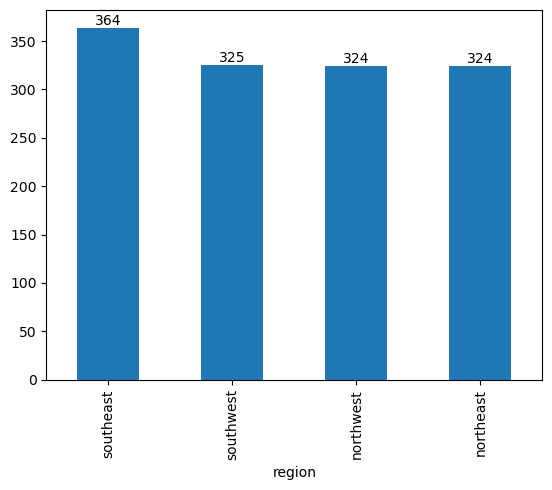

In [57]:
ax = insurance_data1["region"].value_counts().plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i)

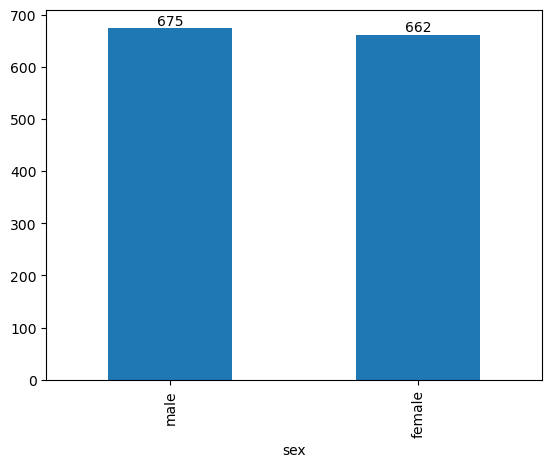

In [58]:
ax = insurance_data1["sex"].value_counts().plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i)

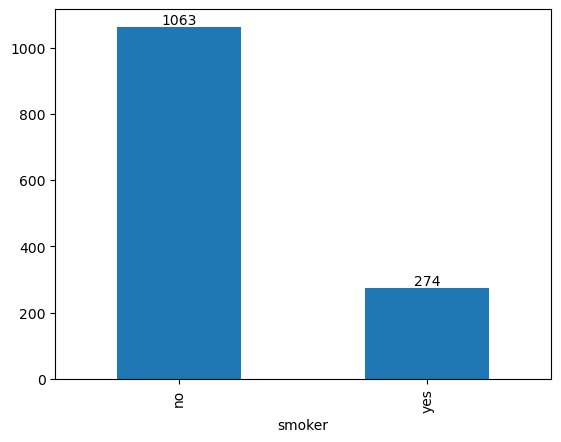

In [59]:
ax = insurance_data1["smoker"].value_counts().plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i)

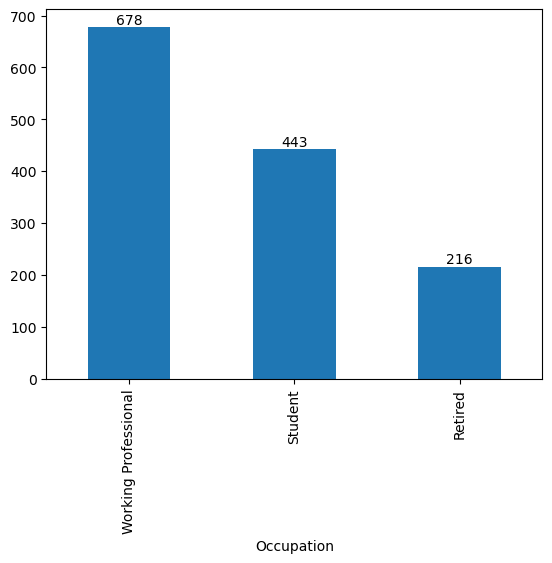

In [60]:
ax = insurance_data1["Occupation"].value_counts().plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i)

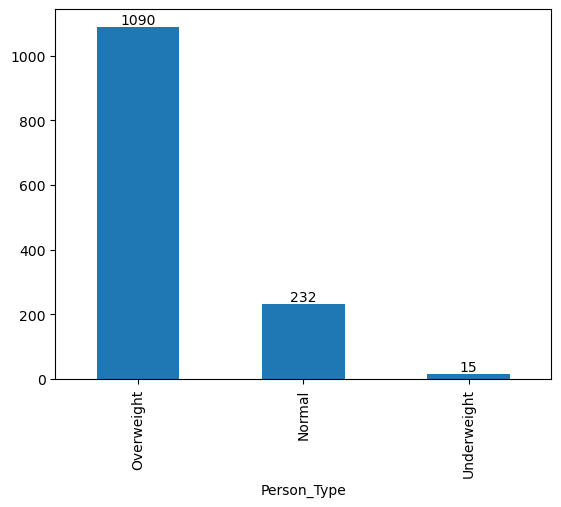

In [61]:
ax = insurance_data1["Person_Type"].value_counts().plot(kind = 'bar')
for i in ax.containers:
    ax.bar_label(i)

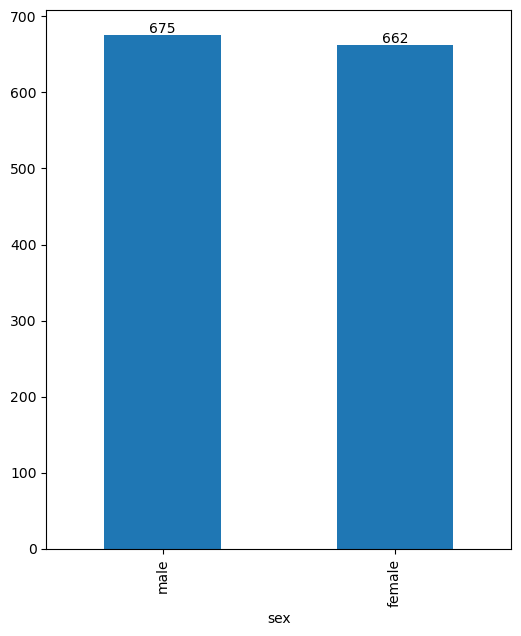

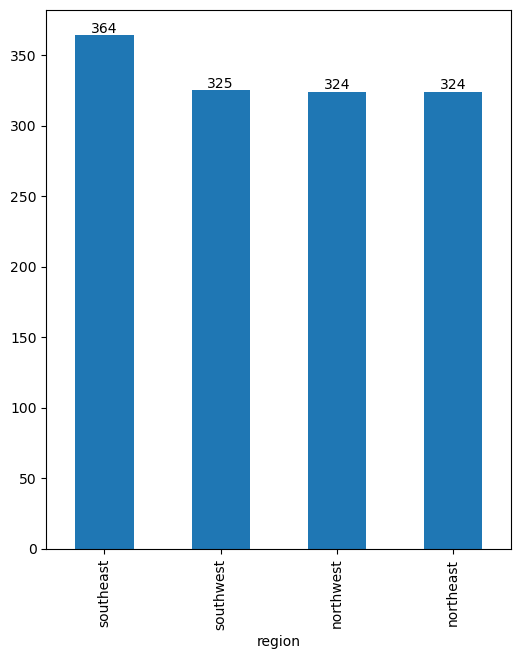

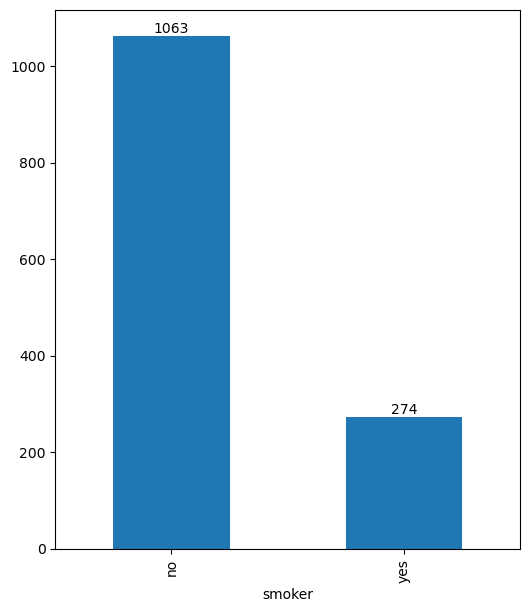

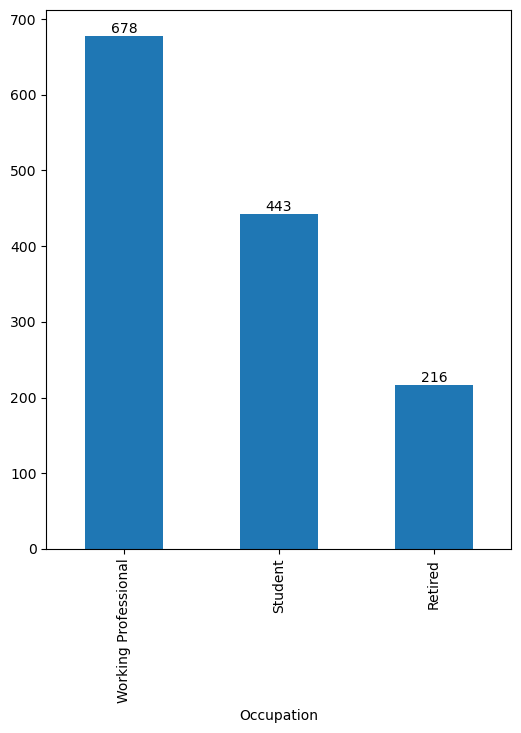

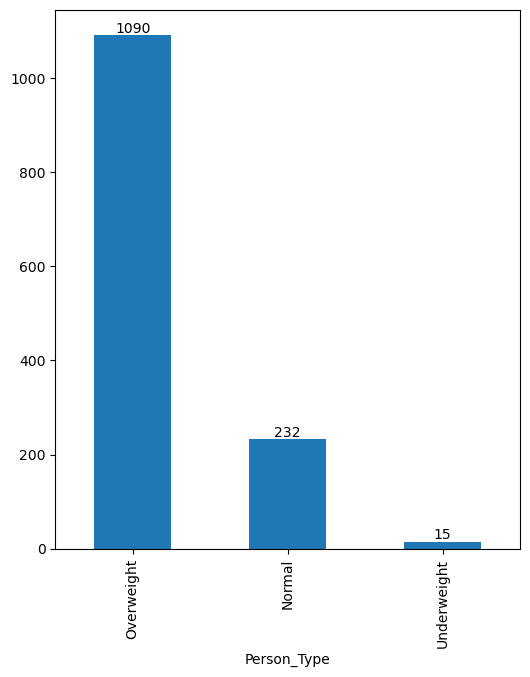

In [62]:
Cat_columns = ['sex', 'region','smoker','Occupation','Person_Type']

for col in Cat_columns:
    plt.figure(figsize = (6,7))
    ax = insurance_data1[col].value_counts().plot(kind = 'bar')
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

#### Histogram : Ploted for numerical data

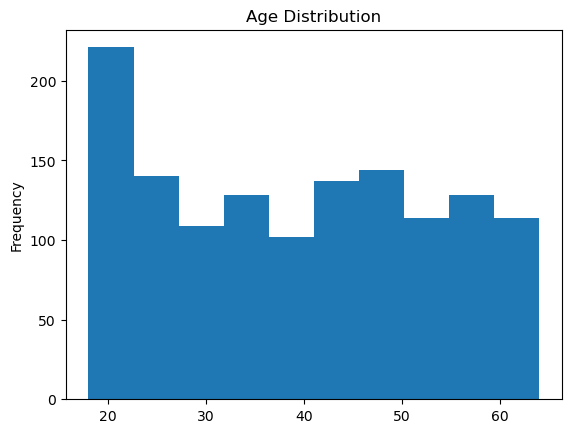

In [63]:
insurance_data1['age'].plot(kind = 'hist')
plt.title("Age Distribution")
plt.show()

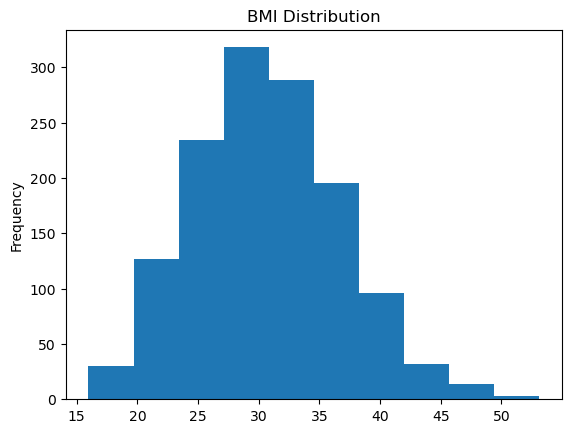

In [64]:
insurance_data1['bmi'].plot(kind = 'hist')
plt.title("BMI Distribution")
plt.show()

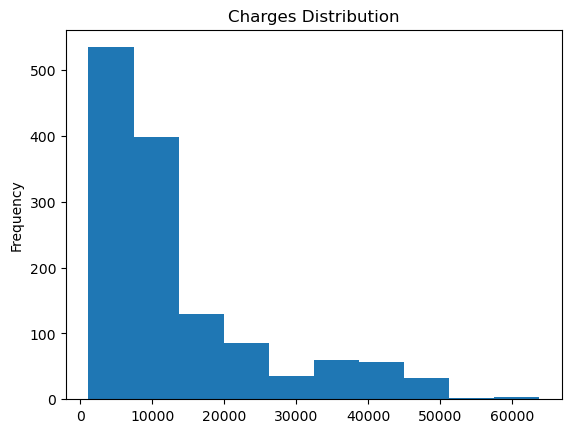

In [65]:
insurance_data1['charges'].plot(kind = 'hist')
plt.title("Charges Distribution")
plt.show()

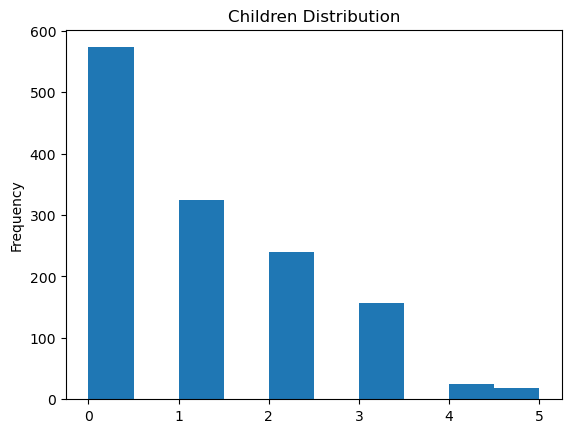

In [66]:
insurance_data1['children'].plot(kind = 'hist')
plt.title("Children Distribution")
plt.show()

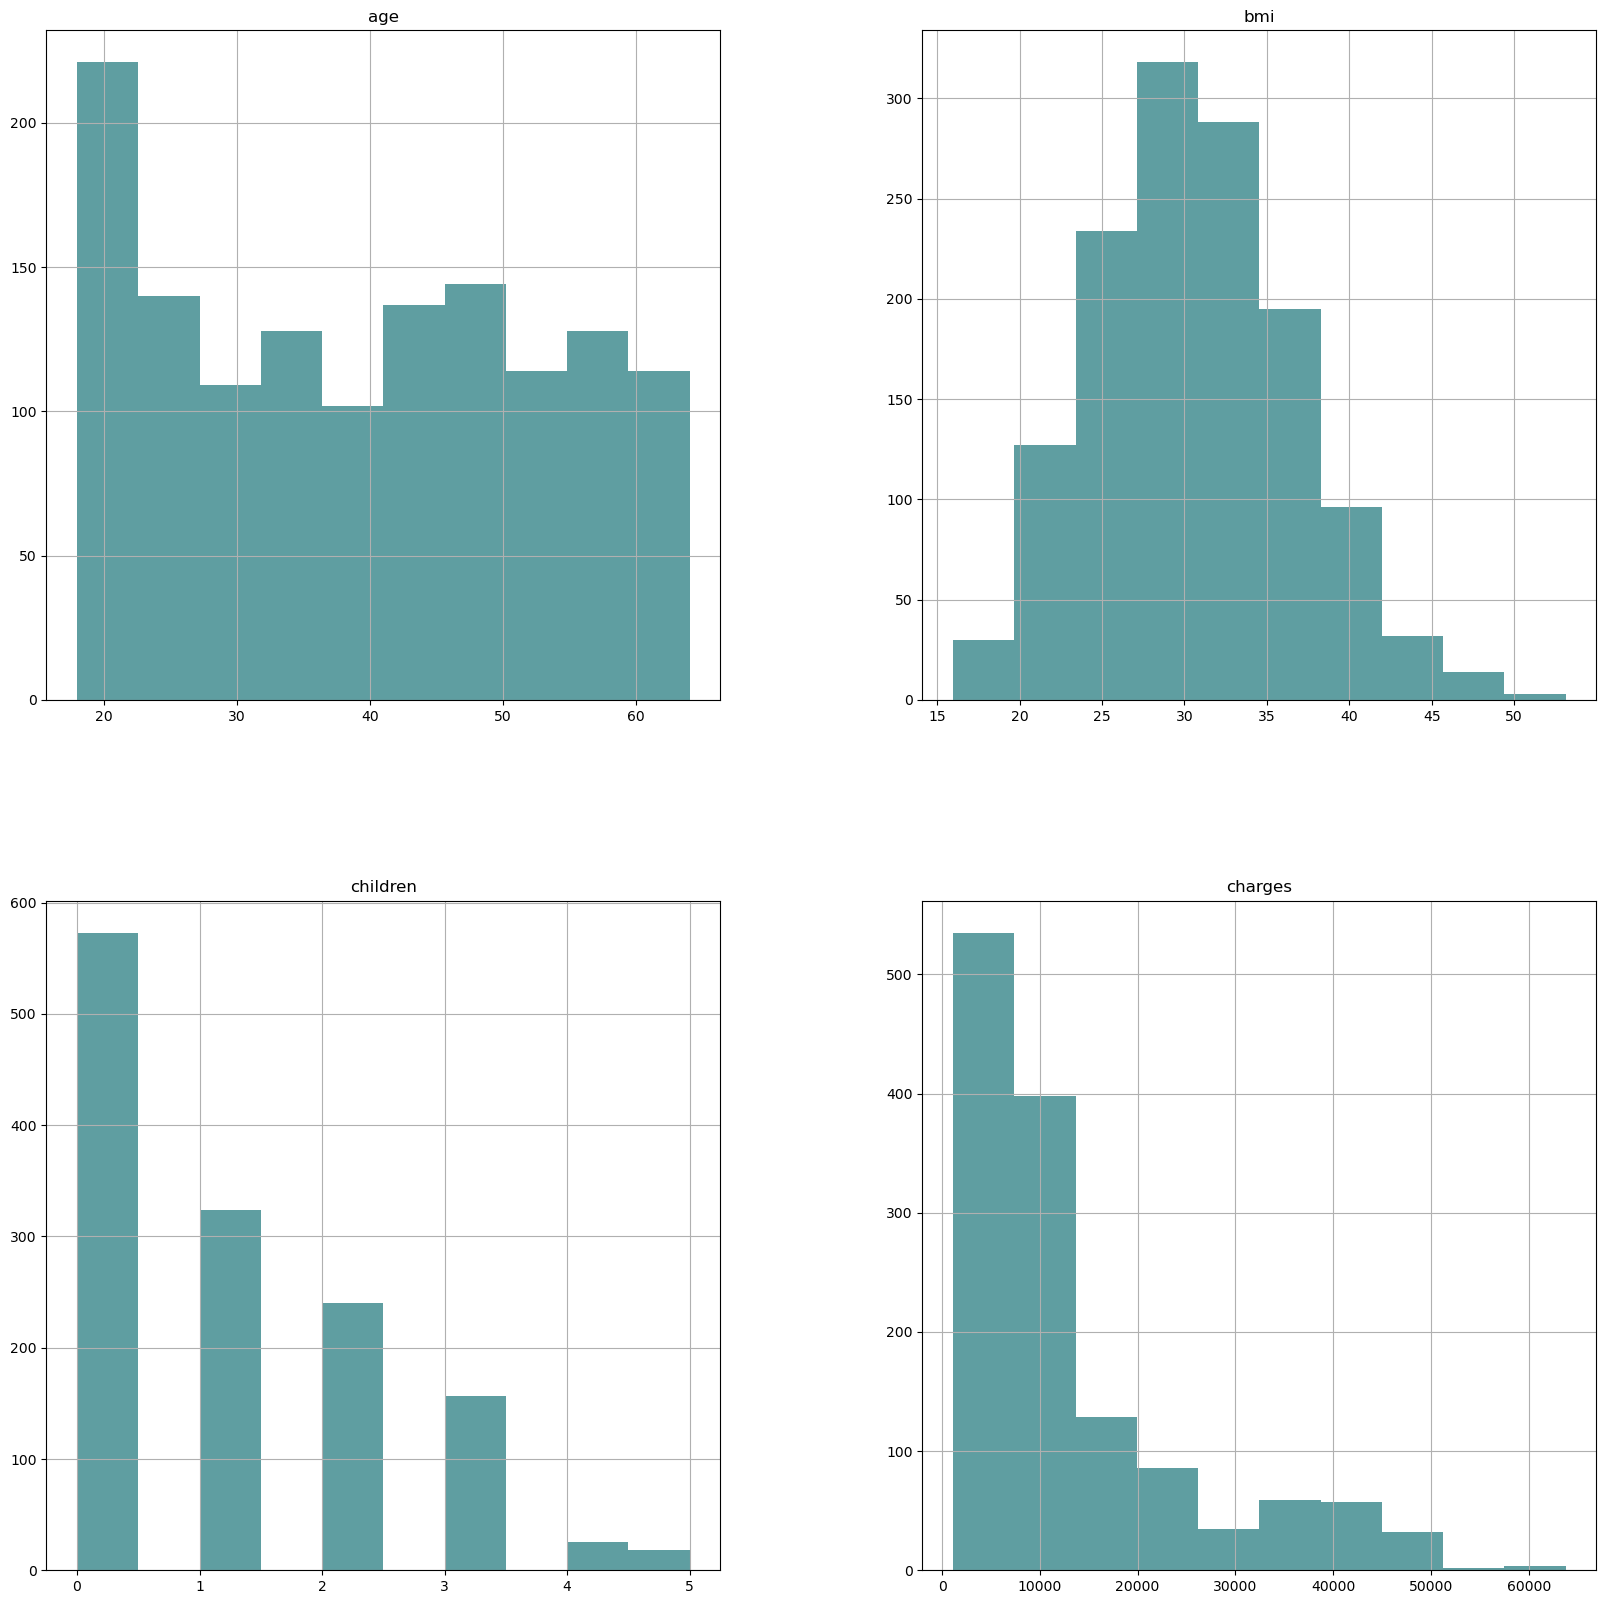

In [67]:
data_hist_plot = insurance_data1.hist(figsize = (20,20),color = "#5F9EA1")

#### Box Plot: Numeric Columns & basically use to show 5 sata summary & identify the outliers

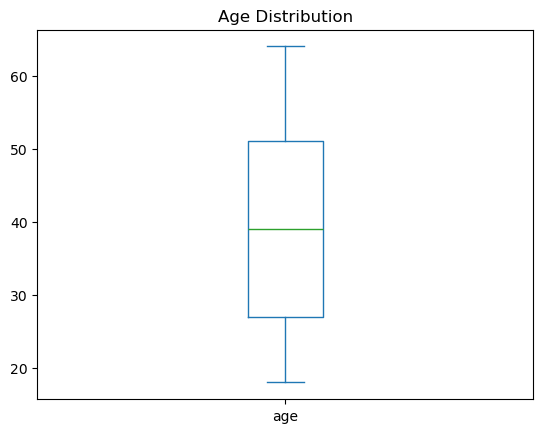

In [68]:
insurance_data1['age'].plot(kind = 'box')
plt.title("Age Distribution")
plt.show()

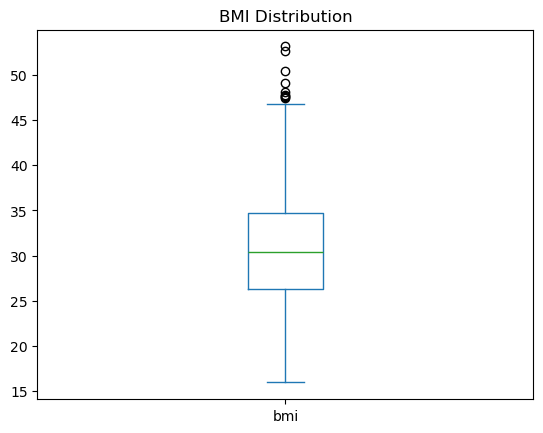

In [69]:
insurance_data1['bmi'].plot(kind = 'box')
plt.title("BMI Distribution")
plt.show()

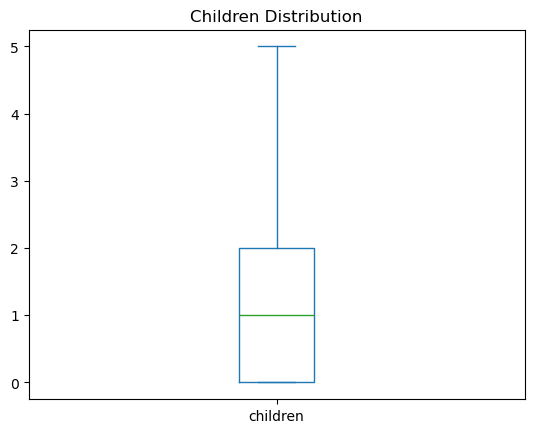

In [70]:
insurance_data1['children'].plot(kind = 'box')
plt.title("Children Distribution")
plt.show()

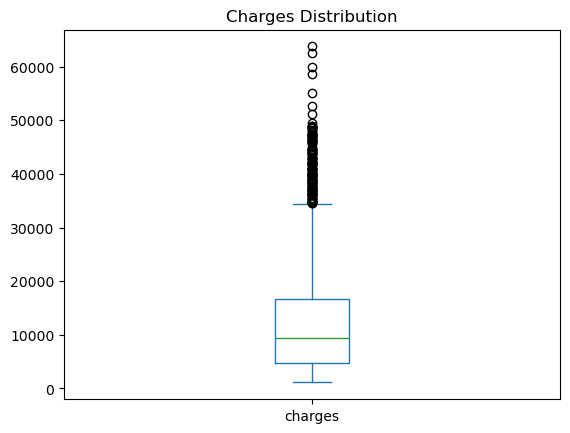

In [71]:
insurance_data1['charges'].plot(kind = 'box')
plt.title("Charges Distribution")
plt.show()

In [72]:
# you can ploat a histogram if it is squed, plot a box plot if the data points are above or lower the viscer or the values areabove or lower

#### Pie Chart - Region (ploted for numerical data)

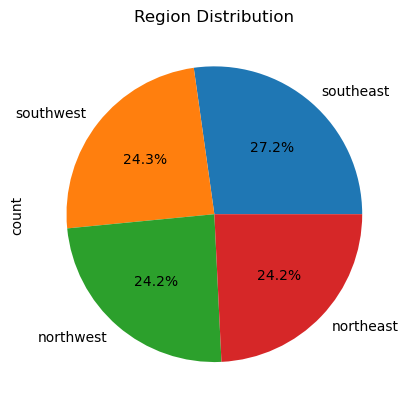

In [73]:
insurance_data1['region'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title("Region Distribution")
plt.show()

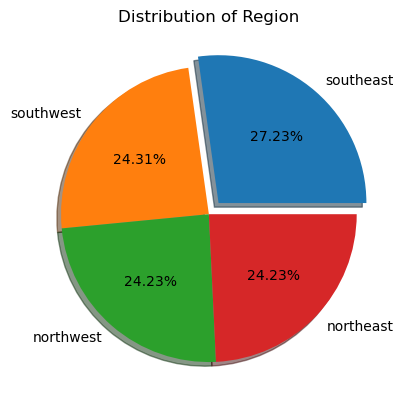

In [74]:
region_count = insurance_data1["region"].value_counts()
plt.pie(labels = region_count.index,
        x=region_count.values,
        shadow = True,
        autopct = '%.2f%%',
        explode = (0.1,0,0,0))
plt.title("Distribution of Region")
plt.show()

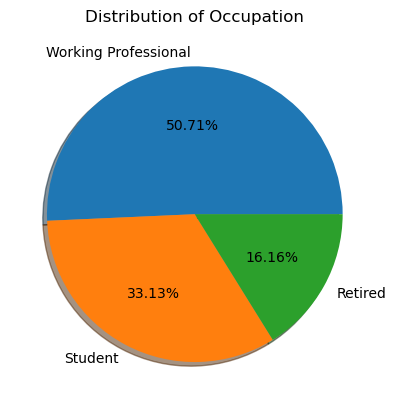

In [75]:
region_count = insurance_data1["Occupation"].value_counts()
plt.pie(labels = region_count.index,
        x=region_count.values,
        shadow = True,
        autopct = '%.2f%%',
        explode = (0,0,0))
plt.title("Distribution of Occupation")
plt.show()

#### Scatter Plot:ploted for numeric one and for 2 variables and it can be positive or negative relationship

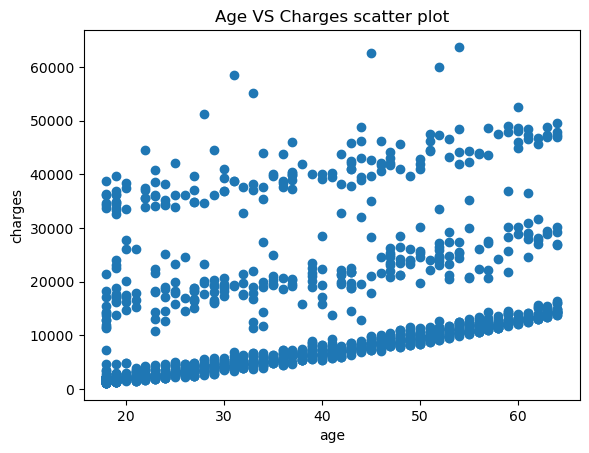

In [76]:
plt.scatter(data = insurance_data1, x = 'age',y = 'charges')
plt.xlabel('age')
plt.ylabel('charges')
plt.title("Age VS Charges scatter plot")
plt.show()

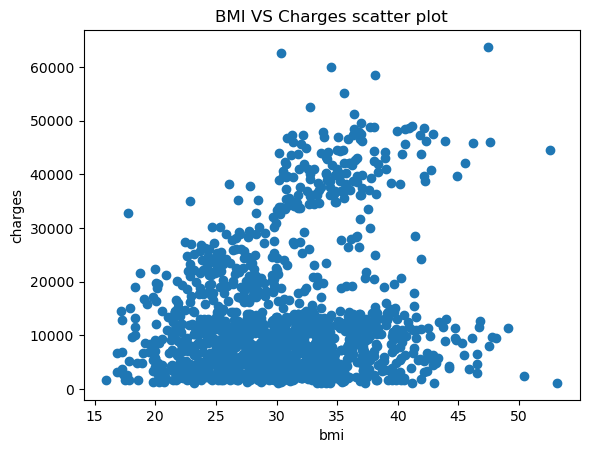

In [77]:
plt.scatter(data = insurance_data1, x = 'bmi',y = 'charges')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title("BMI VS Charges scatter plot")
plt.show()

#### Correlation Matrix: ploted for showing the relation between variables

In [78]:
coor_data = insurance_data1[["age","bmi","charges"]].corr()
coor_data 

,age,bmi,charges
age,1.000000,0.109344,0.298308
bmi,0.109344,1.000000,0.198401
charges,0.298308,0.198401,1.000000


<Axes: >

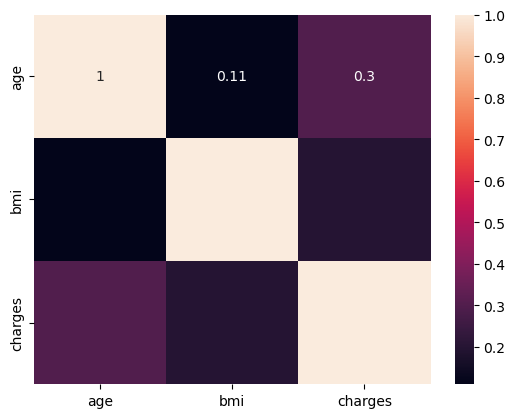

In [79]:
sns.heatmap(round(coor_data,2), annot=True)